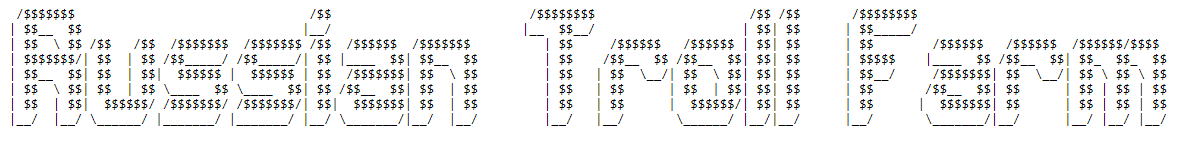

Final Project, what happened? 


This is the PYTHR-august-2019 final project based on Russian Troll Tweets. This project will not have the entire public dataset, only a subset. 


Orignal dataset - https://github.com/fivethirtyeight/russian-troll-tweets/


## Frame:

1. Is there an increase in tweets based on major polical events?
2. Are the folowers or retweeters human or twitter bots?
3. Are there key words that generate a pattern?
4. Is there a correlation between words used and who sent it?
5. Can it be determined who is a more effective Russian troll? 

## Prepare:

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set the plots to display in the Jupyter notebook
%matplotlib inline

russkies = pd.read_csv('Dataset.csv')
russkies.head(5)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,Right,0,RightTroll,0,9.058750e+17,9.145800e+17,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,Right,0,RightTroll,0,9.058750e+17,9.146220e+17,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,Right,1,RightTroll,0,9.058750e+17,9.146230e+17,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,Right,0,RightTroll,0,9.058750e+17,9.146390e+17,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,Right,1,RightTroll,0,9.058750e+17,9.143120e+17,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


In [163]:
russkies.describe()

,external_author_id,following,followers,updates,retweet,new_june_2018,alt_external_id,tweet_id,TweetDate_Year,TweetDate_Month,TweetDate_Week,type_as_num
count,4.944110e+05,494411.000000,494411.000000,494411.000000,494411.000000,494411.000000,4.944110e+05,4.944110e+05,494411.000000,494411.000000,494411.000000,494411.000000
mean,2.330425e+17,2259.415557,2643.940695,5984.199761,0.532984,0.180324,2.330767e+17,7.821597e+17,2016.197700,7.162883,29.335816,285.123505
std,3.821831e+17,3304.265734,5169.602235,7706.238884,0.498911,0.384457,3.822389e+17,9.809169e+16,0.786301,3.188554,13.929087,145.105686
min,3.497640e+07,0.000000,0.000000,1.000000,0.000000,0.000000,3.497640e+07,2.632560e+17,2012.000000,1.000000,1.000000,0.000000
25%,1.679279e+09,281.000000,169.000000,1288.000000,0.000000,0.000000,1.679279e+09,7.002195e+17,2016.000000,5.000000,18.000000,145.000000
50%,2.570250e+09,1195.000000,831.000000,3077.000000,1.000000,0.000000,2.570250e+09,7.980220e+17,2016.000000,8.000000,32.000000,310.000000
75%,7.250000e+17,2689.000000,2465.000000,8082.500000,1.000000,0.000000,7.253060e+17,8.610255e+17,2017.000000,10.000000,40.000000,413.000000
max,9.681310e+17,30194.000000,40788.000000,70028.000000,1.000000,1.000000,9.681310e+17,1.000720e+18,2018.000000,12.000000,53.000000,503.000000


In [8]:
russkies.shape

(494411, 21)

In [8]:
russkies.dtypes

external_author_id    float64
author                 object
content                object
region                 object
language               object
publish_date           object
harvested_date         object
following               int64
followers               int64
updates                 int64
post_type              object
account_type           object
retweet                 int64
account_category       object
new_june_2018           int64
alt_external_id       float64
tweet_id              float64
article_url            object
tco1_step1             object
tco2_step1             object
tco3_step1             object
dtype: object

In [164]:
for col in datecols:
   russkies[col] = pd.to_datetime(russkies[col])

In [165]:
russkies[datecols].head(3)

,publish_date,harvested_date,TweetDate_Year,TweetDate_Month,TweetDate_Week
0,2017-10-01 19:58:00,2017-10-01 19:59:00,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000039
1,2017-10-01 22:43:00,2017-10-01 22:43:00,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000039
2,2017-10-01 22:50:00,2017-10-01 22:51:00,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000039


## Analyse:


In [166]:
#russkies['publish_date'].value_counts().sort_index().head()
russkies['TweetDate_Year'] = russkies['publish_date'].dt.year
russkies['TweetDate_Month'] = russkies['publish_date'].dt.month
russkies['TweetDate_Week'] = russkies['publish_date'].dt.week
russkies[['publish_date', 'TweetDate_Week', 'TweetDate_Month', 'TweetDate_Year']].dtypes
datecols = ['publish_date','harvested_date','TweetDate_Year', 'TweetDate_Month', 'TweetDate_Week']
russkies[datecols].isnull().sum()

publish_date       0
harvested_date     0
TweetDate_Year     0
TweetDate_Month    0
TweetDate_Week     0
dtype: int64

In [167]:
mapping_dict = {}
for type in list(russkies['author']):
    if type in mapping_dict: mapping_dict[type] += 1
    else: mapping_dict[type] = 1
mapping_dict

{'10_GOP': 372,
 '1488REASONS': 52,
 '1D_NICOLE_': 44,
 '1ERIK_LEE': 2,
 '1LORENAFAVA1': 3051,
 '2NDHALFONION': 3,
 '459JISALGE': 1,
 '4EVER1937': 1593,
 '4EVER_SUSAN': 63,
 '4MYSQUAD': 4833,
 '5EMEN5EMENICH': 620,
 '5L5_5L5': 464,
 '666STEVEROGERS': 139,
 '6DRUZ': 832,
 '71BILALJAMIL1': 23,
 'AAASSSSSHHH': 71,
 'AAATEST1234': 1,
 'AAAVADAKEDAVRAA': 544,
 'AAGN1AA': 508,
 'AANTIRACIST': 1252,
 'AARONALLENALL': 18,
 'AARON_M1TCHELL': 4,
 'ABALAKOVAYLIA': 441,
 'ABBASSHUKRI': 1,
 'ABBYLOPTRT': 3,
 'ABELLABAB': 40,
 'ABIGAILCALLME': 70,
 'ABIGAILSSILK': 1714,
 'ABIISSROSB': 750,
 'ABISADMASST': 7,
 'ABMERRLINS': 531,
 'ABOUTPOLIT': 72,
 'ABRAMSREBEKAH': 24,
 'ABUNUWASA': 174,
 'ABU_UBAIDA2': 1,
 'ACAB_ZONE': 279,
 'ACAPARELLA': 559,
 'ACEJINEV': 6260,
 'ACHSAHORKHAN': 5,
 'ACTIVEMIKR': 1,
 'ADALESTRTM': 3,
 'ADAMCHAPMANJR': 1499,
 'ADAMMA_DEFOND': 700,
 'ADAM_MATHISSS': 45,
 'ADDIE_HOL': 149,
 'ADELE_BROCK': 126,
 'ADELIINESTRT': 7,
 'ADELINE_GS': 27,
 'ADELISTRTT': 7,
 'ADKEZLATE': 88,
 

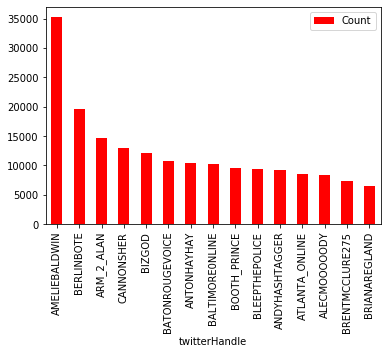

In [181]:
twitterCount = pd.DataFrame.from_dict(mapping_dict, orient='index').reset_index()
twitterCount.columns = ['twitterHandle', 'Count']
twitterCount.sort_values(by=['Count'],ascending=False).head(15).plot(kind='bar', x='twitterHandle', y='Count', color='r');

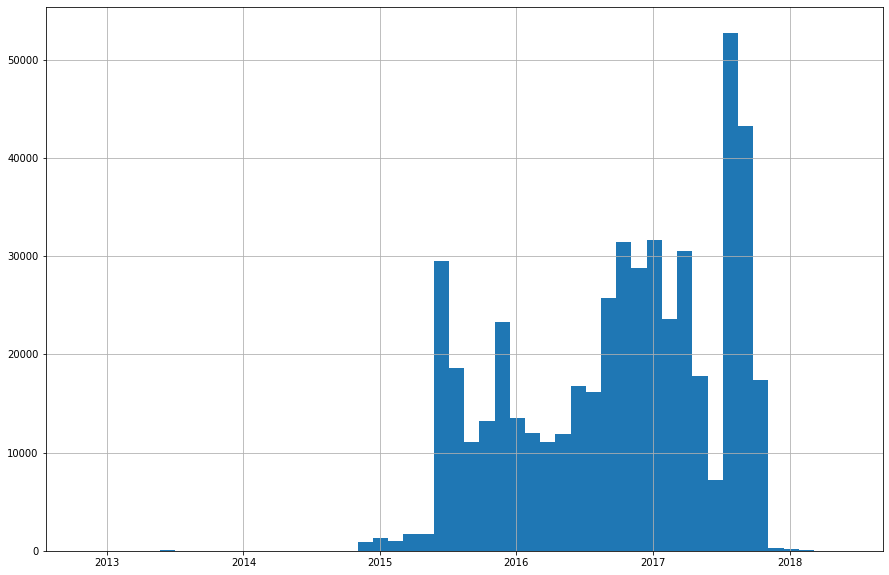

In [196]:
russkies['publish_date'].hist(figsize=(15,10), bins=50);

In [192]:
russkies.plot(kind='scatter',x='TweetDate_Week', y='Count', figsize=(10,5), s=20);

KeyError: 'Count'

How to map or count works in comments?

